In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
data = pd.read_csv(r"C:\Users\ACER\Downloads\train_ctrUa4K.csv")

In [68]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [69]:
data.shape

(614, 13)

In [70]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [72]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [73]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [74]:
# Fill missing values with the mean for numerical columns
data.fillna(data.mean(), inplace=True)

# Fill missing values with the mode for categorical columns
data.fillna(data.mode().iloc[0], inplace=True)


# Verify the filled missing values
null_values = data.isnull().sum()
print("\nAfter filling missing values:")
print(null_values)


After filling missing values:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


C:\Users\ACER\AppData\Local\Temp\ipykernel_7424\3094621073.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


Outlier Handling

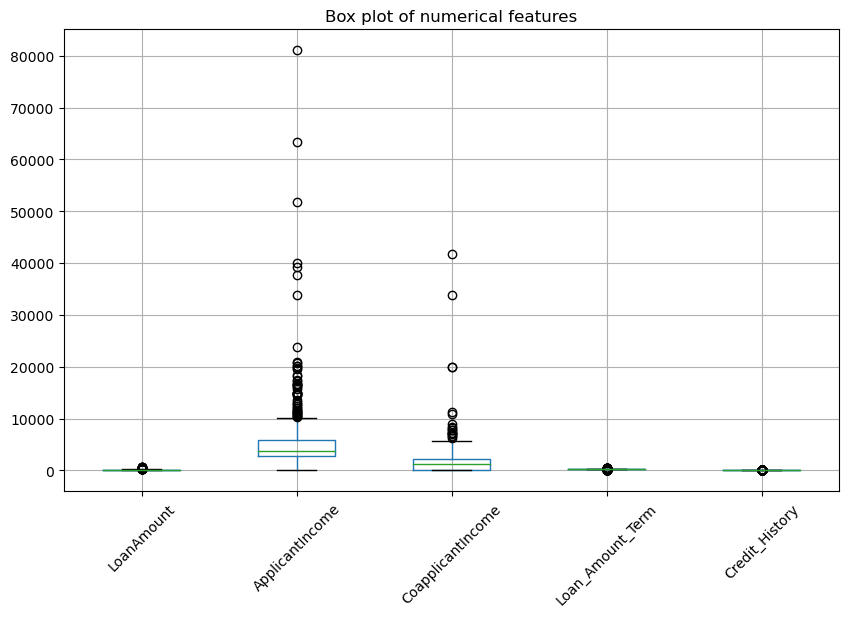

Outliers for LoanAmount:
      Loan_ID  Gender Married Dependents     Education Self_Employed  \
5    LP001011    Male     Yes          2      Graduate           Yes   
9    LP001020    Male     Yes          1      Graduate            No   
21   LP001046    Male     Yes          1      Graduate            No   
34   LP001100    Male      No         3+      Graduate            No   
54   LP001186  Female     Yes          1      Graduate           Yes   
67   LP001233    Male     Yes          1      Graduate            No   
83   LP001273    Male     Yes          0      Graduate            No   
126  LP001448    Male     Yes         3+      Graduate            No   
130  LP001469    Male      No          0      Graduate           Yes   
135  LP001488    Male     Yes         3+      Graduate            No   
155  LP001536    Male     Yes         3+      Graduate            No   
161  LP001562    Male     Yes          0      Graduate            No   
171  LP001585    Male     Yes         3

In [75]:
#  Identify the numerical features
numerical_features = ['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term','Credit_History']

#  Create box plots to visualize potential outliers
plt.figure(figsize=(10, 6))
data[numerical_features].boxplot()
plt.xticks(rotation=45)
plt.title('Box plot of numerical features')
plt.show()

#  Identify potential outliers
# Calculate the IQR (interquartile range) for each numerical feature
Q1 = data[numerical_features].quantile(0.25)
Q3 = data[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers for each numerical feature
outliers = {}
for feature in numerical_features:
    feature_outliers = data[(data[feature] < lower_bound[feature]) |
                                      (data[feature] > upper_bound[feature])]
    outliers[feature] = feature_outliers

#  Print and inspect the outliers
for feature, feature_outliers in outliers.items():
    print(f"Outliers for {feature}:")
    print(feature_outliers)
    print()



In [76]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

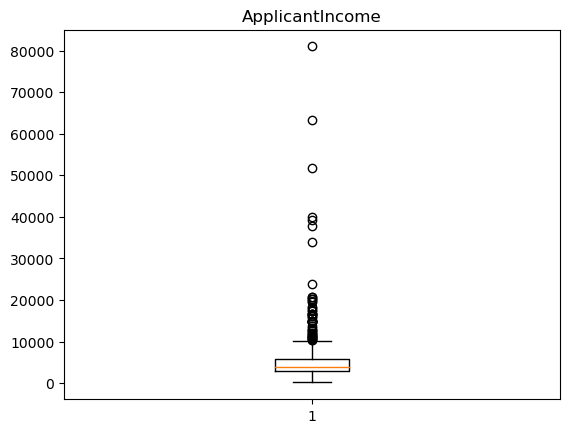

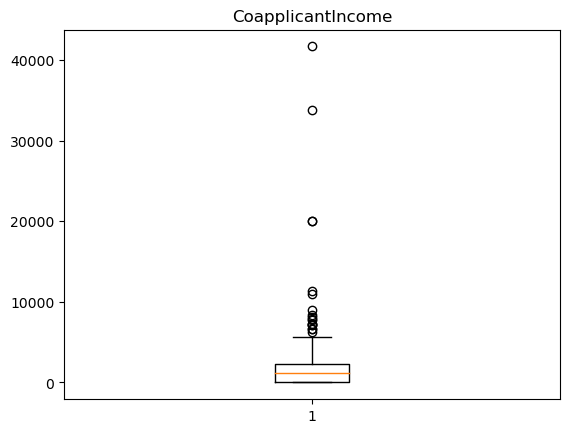

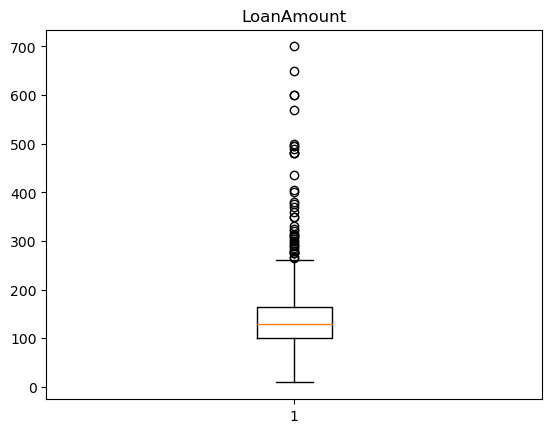

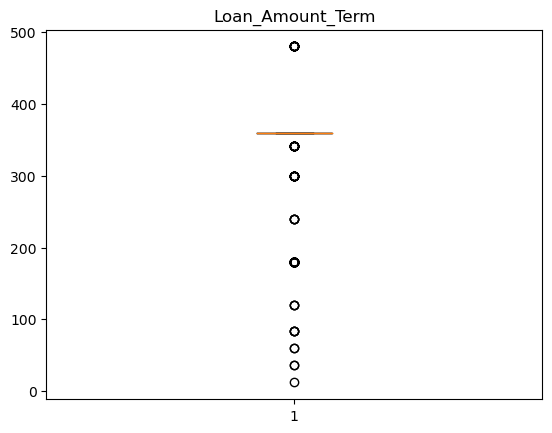

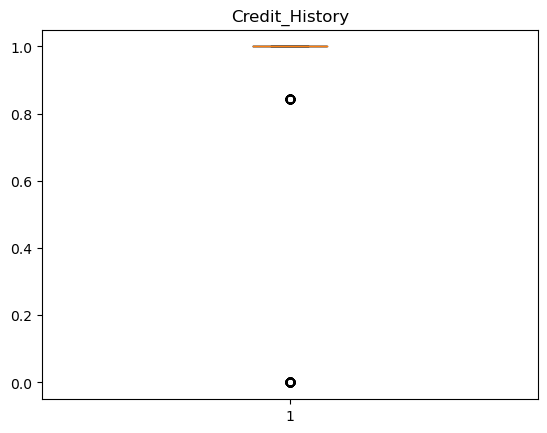

In [77]:
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']
for i in num_cols:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [78]:
Q1 = np.percentile(data['ApplicantIncome'],25,interpolation='midpoint')
Q2 = np.percentile(data['ApplicantIncome'],50,interpolation='midpoint')
Q3 = np.percentile(data['ApplicantIncome'],75,interpolation='midpoint')

C:\Users\ACER\AppData\Local\Temp\ipykernel_7424\2654157438.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['ApplicantIncome'],25,interpolation='midpoint')
C:\Users\ACER\AppData\Local\Temp\ipykernel_7424\2654157438.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['ApplicantIncome'],50,interpolation='midpoint')
C:\Users\ACER\AppData\Local\Temp\ipykernel_7424\2654157438.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest',

In [79]:
print(Q1)
print(Q2)
print(Q3)

2879.0
3812.5
5790.0


In [80]:
data['ApplicantIncome'].median()

3812.5

In [81]:
IQR = Q3-Q1

In [82]:
print(IQR)

2911.0


In [83]:
up_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR

In [84]:
print(up_lim)
print(low_lim)

10156.5
-1487.5


In [85]:
outliers = []
for x in data['ApplicantIncome']:
    if(x>up_lim) or (x<low_lim):
      outliers.append(x)

In [86]:
outliers

[12841,
 12500,
 11500,
 10750,
 13650,
 11417,
 14583,
 10408,
 23803,
 10513,
 20166,
 14999,
 11757,
 14866,
 39999,
 51763,
 33846,
 39147,
 12000,
 11000,
 16250,
 14683,
 11146,
 14583,
 20667,
 20233,
 15000,
 63337,
 19730,
 15759,
 81000,
 14880,
 12876,
 10416,
 37719,
 16692,
 16525,
 16667,
 10833,
 18333,
 17263,
 20833,
 13262,
 17500,
 11250,
 18165,
 19484,
 16666,
 16120,
 12000]

In [87]:
Q1 = np.percentile(data['CoapplicantIncome'],25,interpolation='midpoint')
Q2 = np.percentile(data['CoapplicantIncome'],50,interpolation='midpoint')
Q3 = np.percentile(data['CoapplicantIncome'],75,interpolation='midpoint')

C:\Users\ACER\AppData\Local\Temp\ipykernel_7424\1242185544.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['CoapplicantIncome'],25,interpolation='midpoint')
C:\Users\ACER\AppData\Local\Temp\ipykernel_7424\1242185544.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['CoapplicantIncome'],50,interpolation='midpoint')
C:\Users\ACER\AppData\Local\Temp\ipykernel_7424\1242185544.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'neare

In [88]:
print(Q1)
print(Q2)
print(Q3)

0.0
1188.5
2292.5


In [89]:
data['CoapplicantIncome'].median()

1188.5

In [90]:
IQR = Q3-Q1

In [91]:
print(IQR)

2292.5


In [92]:
up_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR

In [93]:
print(up_lim)
print(low_lim)

5731.25
-3438.75


In [94]:
outliers = []
for x in data['CoapplicantIncome']:
    if(x>up_lim) or (x<low_lim):
      outliers.append(x)

In [95]:
outliers

[10968.0,
 8106.0,
 7210.0,
 8980.0,
 7750.0,
 11300.0,
 7250.0,
 7101.0,
 6250.0,
 7873.0,
 20000.0,
 20000.0,
 8333.0,
 6667.0,
 6666.0,
 7166.0,
 33837.0,
 41667.0]

In [96]:
Q1 = np.percentile(data['LoanAmount'],25,interpolation='midpoint')
Q2 = np.percentile(data['LoanAmount'],50,interpolation='midpoint')
Q3 = np.percentile(data['LoanAmount'],75,interpolation='midpoint')

C:\Users\ACER\AppData\Local\Temp\ipykernel_7424\1317242131.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['LoanAmount'],25,interpolation='midpoint')
C:\Users\ACER\AppData\Local\Temp\ipykernel_7424\1317242131.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['LoanAmount'],50,interpolation='midpoint')
C:\Users\ACER\AppData\Local\Temp\ipykernel_7424\1317242131.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 

In [97]:
print(Q1)
print(Q2)
print(Q3)

100.5
129.0
164.5


In [98]:
data['LoanAmount'].median()

129.0

In [99]:
IQR = Q3-Q1

In [100]:
print(IQR)

64.0


In [101]:
up_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR

In [102]:
print(up_lim)
print(low_lim)

260.5
4.5


In [103]:
outliers = []
for x in data['LoanAmount']:
    if(x>up_lim) or (x<low_lim):
      outliers.append(x)

In [104]:
outliers

[267.0,
 349.0,
 315.0,
 320.0,
 286.0,
 312.0,
 265.0,
 370.0,
 650.0,
 290.0,
 600.0,
 275.0,
 700.0,
 495.0,
 280.0,
 279.0,
 304.0,
 330.0,
 436.0,
 480.0,
 300.0,
 376.0,
 490.0,
 308.0,
 570.0,
 380.0,
 296.0,
 275.0,
 360.0,
 405.0,
 500.0,
 480.0,
 311.0,
 480.0,
 400.0,
 324.0,
 600.0,
 275.0,
 292.0,
 350.0,
 496.0]

In [105]:
Q1 = np.percentile(data['Loan_Amount_Term'],25,interpolation='midpoint')
Q2 = np.percentile(data['Loan_Amount_Term'],50,interpolation='midpoint')
Q3 = np.percentile(data['Loan_Amount_Term'],75,interpolation='midpoint')

C:\Users\ACER\AppData\Local\Temp\ipykernel_7424\87478988.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['Loan_Amount_Term'],25,interpolation='midpoint')
C:\Users\ACER\AppData\Local\Temp\ipykernel_7424\87478988.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['Loan_Amount_Term'],50,interpolation='midpoint')
C:\Users\ACER\AppData\Local\Temp\ipykernel_7424\87478988.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lo

In [106]:
print(Q1)
print(Q2)
print(Q3)

360.0
360.0
360.0


In [107]:
data['Loan_Amount_Term'].median()

360.0

In [108]:
IQR = Q3-Q1

In [109]:
print(IQR)

0.0


In [110]:
up_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR

In [111]:
print(up_lim)
print(low_lim)

360.0
360.0


In [112]:
outliers = []
for x in data['Loan_Amount_Term']:
    if(x>up_lim) or (x<low_lim):
      outliers.append(x)

In [113]:
outliers

[120.0,
 240.0,
 342.0,
 342.0,
 342.0,
 342.0,
 180.0,
 180.0,
 60.0,
 300.0,
 342.0,
 480.0,
 300.0,
 240.0,
 180.0,
 120.0,
 180.0,
 180.0,
 480.0,
 342.0,
 180.0,
 180.0,
 480.0,
 120.0,
 180.0,
 180.0,
 180.0,
 180.0,
 342.0,
 480.0,
 300.0,
 180.0,
 480.0,
 180.0,
 300.0,
 180.0,
 342.0,
 180.0,
 342.0,
 480.0,
 180.0,
 342.0,
 180.0,
 60.0,
 180.0,
 180.0,
 480.0,
 180.0,
 36.0,
 180.0,
 300.0,
 480.0,
 480.0,
 84.0,
 180.0,
 180.0,
 180.0,
 342.0,
 180.0,
 480.0,
 300.0,
 480.0,
 342.0,
 300.0,
 180.0,
 180.0,
 480.0,
 180.0,
 180.0,
 180.0,
 300.0,
 300.0,
 342.0,
 342.0,
 180.0,
 240.0,
 300.0,
 300.0,
 180.0,
 180.0,
 180.0,
 180.0,
 300.0,
 84.0,
 12.0,
 480.0,
 300.0,
 180.0,
 480.0,
 180.0,
 180.0,
 36.0,
 180.0,
 480.0,
 84.0,
 84.0,
 180.0,
 240.0,
 180.0,
 180.0,
 180.0,
 180.0]

In [114]:
Q1 = np.percentile(data['Credit_History'],25,interpolation='midpoint')
Q2 = np.percentile(data['Credit_History'],50,interpolation='midpoint')
Q3 = np.percentile(data['Credit_History'],75,interpolation='midpoint')

C:\Users\ACER\AppData\Local\Temp\ipykernel_7424\2180486814.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['Credit_History'],25,interpolation='midpoint')
C:\Users\ACER\AppData\Local\Temp\ipykernel_7424\2180486814.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['Credit_History'],50,interpolation='midpoint')
C:\Users\ACER\AppData\Local\Temp\ipykernel_7424\2180486814.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', '

In [115]:
print(Q1)
print(Q2)
print(Q3)

1.0
1.0
1.0


In [116]:
data['Credit_History'].median()

1.0

In [117]:
IQR = Q3-Q1

In [118]:
print(IQR)

0.0


In [119]:
up_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR

In [120]:
print(up_lim)
print(low_lim)

1.0
1.0


In [121]:
outliers = []
for x in data['Credit_History']:
    if(x>up_lim) or (x<low_lim):
      outliers.append(x)

In [122]:
outliers

[0.0,
 0.8421985815602837,
 0.0,
 0.0,
 0.0,
 0.0,
 0.8421985815602837,
 0.8421985815602837,
 0.0,
 0.8421985815602837,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.8421985815602837,
 0.8421985815602837,
 0.8421985815602837,
 0.8421985815602837,
 0.0,
 0.0,
 0.8421985815602837,
 0.0,
 0.8421985815602837,
 0.0,
 0.8421985815602837,
 0.8421985815602837,
 0.0,
 0.0,
 0.0,
 0.8421985815602837,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.8421985815602837,
 0.0,
 0.8421985815602837,
 0.8421985815602837,
 0.0,
 0.0,
 0.0,
 0.8421985815602837,
 0.0,
 0.8421985815602837,
 0.8421985815602837,
 0.0,
 0.0,
 0.0,
 0.8421985815602837,
 0.8421985815602837,
 0.0,
 0.8421985815602837,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.8421985815602837,
 0.8421985815602837,
 0.8421985815602837,
 0.8421985815602837,
 0.8421985815602837,
 0.0,
 0.0,
 0.0,
 0.0,
 0.8421985815602837,
 0.0,
 0.0,
 0.8421985815602837,
 0.0,
 0.0,
 0.8421985815602837,
 0.0,
 0.8421985815602837,
 0.8421985815602837,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [123]:
#  Identify the numerical features
numerical_features = ['ApplicantIncome','LoanAmount','CoapplicantIncome','Loan_Amount_Term','Credit_History']

#  Define percentiles for flooring and capping
lower_bound = 0.01  # Adjust the lower bound percentile as per your requirement
upper_bound = 0.99  # Adjust the upper bound percentile as per your requirement

#  Create a copy of the original data for comparison
original_data = data.copy()

#  Apply flooring and capping to each numerical feature
for feature in numerical_features:
    feature_lower_bound = data[feature].quantile(lower_bound)
    feature_upper_bound = data[feature].quantile(upper_bound)
    
    data[feature] = np.where(data[feature] < feature_lower_bound,
                                        feature_lower_bound,
                                        data[feature])
    data[feature] = np.where(data[feature] > feature_upper_bound,
                                        feature_upper_bound,
                                        data[feature])

#  Compare the original and modified values
for feature in numerical_features:
    print(f"Feature: {feature}")
    print("Original values:")
    print(original_data[feature])
    print("Modified values:")
    print(data[feature])
    print()


Feature: ApplicantIncome
Original values:
0      5849
1      4583
2      3000
3      2583
4      6000
       ... 
609    2900
610    4106
611    8072
612    7583
613    4583
Name: ApplicantIncome, Length: 614, dtype: int64
Modified values:
0      5849.0
1      4583.0
2      3000.0
3      2583.0
4      6000.0
        ...  
609    2900.0
610    4106.0
611    8072.0
612    7583.0
613    4583.0
Name: ApplicantIncome, Length: 614, dtype: float64

Feature: LoanAmount
Original values:
0      146.412162
1      128.000000
2       66.000000
3      120.000000
4      141.000000
          ...    
609     71.000000
610     40.000000
611    253.000000
612    187.000000
613    133.000000
Name: LoanAmount, Length: 614, dtype: float64
Modified values:
0      146.412162
1      128.000000
2       66.000000
3      120.000000
4      141.000000
          ...    
609     71.000000
610     40.000000
611    253.000000
612    187.000000
613    133.000000
Name: LoanAmount, Length: 614, dtype: float64

Feature: Co

In [124]:
#splitting data to feature and target
x = data.drop(['Loan_Status','Loan_ID'],axis=1)
y = data['Loan_Status']

One Hot Encoding

In [125]:
# Create a sample DataFrame with a categorical variable
data = {'Category':['Gender','Married','Dependents','Education','Self_Employed','Property_Area']}
data = pd.DataFrame(data)

# Apply one-hot encoding using pd.get_dummies()
encoded_data = pd.get_dummies(data['Category'])

# Concatenate the encoded columns with the original DataFrame
data_encoded = pd.concat([data, encoded_data], axis=1)

print(data_encoded)


        Category  Dependents  Education  Gender  Married  Property_Area  \
0         Gender           0          0       1        0              0   
1        Married           0          0       0        1              0   
2     Dependents           1          0       0        0              0   
3      Education           0          1       0        0              0   
4  Self_Employed           0          0       0        0              0   
5  Property_Area           0          0       0        0              1   

   Self_Employed  
0              0  
1              0  
2              0  
3              0  
4              1  
5              0  


In [126]:
from sklearn.model_selection import train_test_split
x_train,X_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)